<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span><ul class="toc-item"><li><span><a href="#Признаки" data-toc-modified-id="Признаки-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Признаки</a></span></li><li><span><a href="#Целевой-признак" data-toc-modified-id="Целевой-признак-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Целевой признак</a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Взвешивание классов</a></span></li><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Увеличение выборки</a></span></li><li><span><a href="#Уменьшение-выборки" data-toc-modified-id="Уменьшение-выборки-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Уменьшение выборки</a></span></li></ul></li><li><span><a href="#Подбор-гиперпараметров" data-toc-modified-id="Подбор-гиперпараметров-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Подбор гиперпараметров</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Прогнозирование оттока клиентов Банка

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

## Описание проекта

Из Банка стали уходить клиенты. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

### Признаки

- `RowNumber` — индекс строки в данных
- `CustomerId`— уникальный идентификатор клиента
- `Surname` — фамилия
- `CreditScore` — кредитный рейтинг
- `Geography` — страна проживания
- `Gender` — пол
- `Age` — возраст
- `Tenure` — сколько лет человек является клиентом банка
- `Balance` — баланс на счёте
- `NumOfProducts` — количество продуктов банка, используемых клиентом
- `HasCrCard` — наличие кредитной карты
- `IsActiveMember` — активность клиента
- `EstimatedSalary` — предполагаемая зарплата

### Целевой признак

- `Exited` — факт ухода клиента

In [2]:
df_churn = pd.read_csv('/datasets/Churn.csv')

In [3]:
df_churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [4]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Первичные выводы:

- в столбце `Tenure` присутствуют пропуски;

- `Geography` и `Gender` можно преобразовать в столбцы с численными переменными;

- для столбцов `Age`, `Tenure`, `Balance`, `NumOfProducts`, `EstimatedSalary` можно будет произвести масштабирование признаков; 

## Подготовка данных

Приведем названия столбцов к "змеиному" регистру:

In [5]:
df_churn.columns.str.lower()

Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')

In [6]:
df_churn.columns = ['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited']

Заменим пропуски в столбце `tenure` медианными значениями в зависимости от возраста:

In [7]:
df_churn['tenure'].isna().mean()

0.0909

In [8]:
df_churn['tenure'] = df_churn['tenure'].fillna(df_churn.groupby('age')['tenure'].transform('median'))

Преобразуем категориальные признаки в численные с помощью техники прямого кодирования:


In [9]:
df_churn['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [10]:
df_churn['geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

Чтобы избежать дамми-ловушки, используем аргумент `drop_first`:

In [11]:
df_churn = pd.get_dummies(df_churn, columns=['gender', 'geography'], drop_first=True)

Переименуем новые столбцы:

In [12]:
df_churn.columns = df_churn.columns.str.lower()

In [13]:
df_churn.head()

,row_number,customer_id,surname,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,gender_male,geography_germany,geography_spain
0,1,15634602,Hargrave,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,2,15647311,Hill,608,41,1.0,83807.86,1,0,1,112542.58,0,0,0,1
2,3,15619304,Onio,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,4,15701354,Boni,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,5,15737888,Mitchell,850,43,2.0,125510.82,1,1,1,79084.10,0,0,0,1


Подготовим признаки и целевой признак:

In [14]:
features = df_churn.drop(['exited', 'row_number', 'customer_id', 'surname'], axis=1)
target = df_churn['exited']

Разделим данные на обучающую, валидационную и тестовую выборки с соотношением 3:1:1 соответственно.

In [15]:
features_train, features_valid_test, target_train, target_valid_test = train_test_split(
    features, target, test_size = 0.4, random_state=12345)

In [16]:
features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid_test, target_valid_test, test_size = 0.5, random_state=12345)

Приведем количественные признаки к одному масштабу с помощью стандартизации данных:

In [17]:
numeric = ['age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']

scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])

features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

/tmp/ipykernel_136/2615528341.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train[numeric] = scaler.transform(features_train[numeric])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/tmp/ipykernel_136/2615528341.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [18]:
features_train.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,gender_male,geography_germany,geography_spain
7479,567,-0.373192,1.081900,1.232271,-0.891560,1,0,-0.187705,1,0,1
3411,711,-0.183385,1.081900,0.600563,-0.891560,0,0,-0.333945,0,0,0
6027,850,0.480939,-0.736979,1.027098,0.830152,0,1,1.503095,1,1,0
1247,512,-1.417129,0.354348,-1.233163,0.830152,1,0,-1.071061,1,0,0
3716,665,-1.132419,-1.100755,1.140475,-0.891560,0,0,1.524268,0,1,0


## Исследование задачи

Изучим баланс классов в целевом признаке: 

0    0.7963
1    0.2037
Name: exited, dtype: float64


<AxesSubplot:>

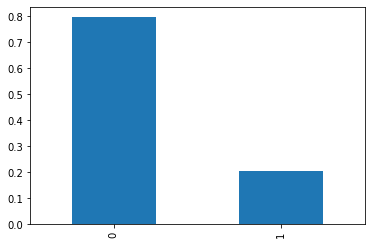

In [19]:
class_frequency = df_churn['exited'].value_counts(normalize=True)
print(class_frequency)

class_frequency.plot(kind='bar')

По графику заметен дисбаланс классов - на положительный класс приходится только около 20%.

Исследуем дисбаланс на двух моделях:

In [20]:
model_forest = RandomForestClassifier(random_state=12345) 

model_forest.fit(features_train, target_train)
predicted_valid_forest = model_forest.predict(features_valid)

In [21]:
model_lr = LogisticRegression(random_state=12345, solver='liblinear')

model_lr.fit(features_train, target_train)
predicted_valid_lr = model_lr.predict(features_valid)

Изучим матрицу ошибок обеих моделей:

In [22]:
confusion_matrix(target_valid, predicted_valid_forest)

array([[1525,   57],
       [ 228,  190]])

In [23]:
confusion_matrix(target_valid, predicted_valid_lr)

array([[1505,   77],
       [ 321,   97]])

По получившимся матрицам видим, что модели часто выдают ложноотрицательный результат. 

Посчитаем также метрику F1:

In [24]:
f1_score(target_valid, predicted_valid_forest)

0.5714285714285714

In [25]:
f1_score(target_valid, predicted_valid_lr)

0.3277027027027027

F1-мера показывает недостаточно хорошее значение, особенно для модели логистической регрессии.

## Борьба с дисбалансом

Исследуем несколько способов борьбы с дисбалансом классов и выберем способ с наилучшей F1-мерой.

### Взвешивание классов

In [26]:
model_lr = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')

model_lr.fit(features_train, target_train)
predicted_valid_lr = model_lr.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid_lr))

F1: 0.4905982905982907


F1-мера с 0.33 заметно увеличилась до 0.49, но, в целом, результат остается плохим.

In [27]:
model_forest = RandomForestClassifier(random_state=12345, class_weight='balanced') 

model_forest.fit(features_train, target_train)
predicted_valid_forest = model_forest.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid_forest))

F1: 0.5819295558958653


F1-мера с 0.571 немного увеличилась до 0.582, но, в целом, результат неудовлетворительный.

### Увеличение выборки

Создадим и применим функцию `upsample` для увеличения в выборке объектов положительного класса:

In [28]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [29]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

In [30]:
model_lr = LogisticRegression(random_state=12345, solver='liblinear')

model_lr.fit(features_upsampled, target_upsampled)
predicted_valid_lr = model_lr.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid_lr))

F1: 0.48843187660668386


In [31]:
model_forest = RandomForestClassifier(random_state=12345) 

model_forest.fit(features_upsampled, target_upsampled)
predicted_valid_forest = model_forest.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid_forest))

F1: 0.6008010680907877


In [32]:
target_upsampled.value_counts(normalize=True)

0    0.501043
1    0.498957
Name: exited, dtype: float64

F1-мера заметно увеличилась.

### Уменьшение выборки

Создадим и применим функцию `downsample` для уменьшения в выборке объектов отрицательного класса:

In [33]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

In [34]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

In [35]:
model_lr = LogisticRegression(random_state=12345, solver='liblinear')

model_lr.fit(features_downsampled, target_downsampled)
predicted_valid_lr = model_lr.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid_lr))

F1: 0.48620689655172417


In [36]:
model_forest = RandomForestClassifier(random_state=12345)

model_forest.fit(features_downsampled, target_downsampled)
predicted_valid_forest = model_forest.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid_forest))

F1: 0.590566037735849


In [37]:
target_downsampled.value_counts(normalize=True)

0    0.501043
1    0.498957
Name: exited, dtype: float64

После уменьшения выборки F1-мера увеличилась у обеих моделей, но наилучший результат мы получили при её увеличении, следовательно, для дальнейшего исследования выбираем способ с увеличением выборки и  модель Лес.

## Подбор гиперпараметров

Определим гиперпараметры с помощью функции `GridSearchCV`:

In [38]:
clf = RandomForestClassifier(random_state=12345)

parametrs = {'n_estimators': range (28, 33, 2),
              'max_depth': range (15, 19, 2) ,
              'min_samples_leaf': range (2, 4),
              'min_samples_split': range (6, 10, 2) }

In [39]:
grid = GridSearchCV(clf, parametrs, cv=5)
grid.fit(features_downsampled, target_downsampled)

grid.best_params_

{'max_depth': 17,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 32}

Обучим итоговую модель с учетом дисбаланса классов и найденными гиперпараметрами:

In [40]:
model_balanced = RandomForestClassifier(random_state=12345, max_depth=17, n_estimators=32, 
                                        min_samples_leaf=3 , min_samples_split=8) 

model_balanced.fit(features_upsampled, target_upsampled)
predicted_valid = model_balanced.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.605080831408776


## Тестирование модели

In [41]:
prediction = model_balanced.predict(features_test)

print("F1:", f1_score(target_test, prediction))

F1: 0.608092485549133


Метрика F1 получилась близкой к метрике на обучающей выборке и немного больше 0.59.

Изучим метрику AUC-ROC:

In [42]:
probabilities_test = model_balanced.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

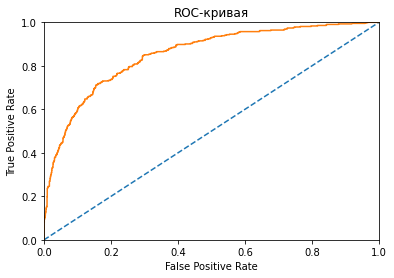

In [43]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test) 

plt.figure()

plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 

In [44]:
roc_auc_score(target_test, probabilities_one_test)

0.8531093391857838

В итоге, мы получили обученную модель с значениями F1 равной 0.608 и AUC-ROC равной 0.853 для тестовой выборки.